Matriz Ybus (7x7):
Ybus = [
  [0.1807 + -8.3314j, -0.1804 + 8.3313j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, ],
  [-0.1804 + 8.3313j, 280.9083 + -450.5001j, -140.3638 + 221.1794j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, -140.3638 + 221.1794j, 0.0000 + 0.0000j, ],
  [0.0000 + 0.0000j, -140.3638 + 221.1794j, 233.9397 + -368.3947j, -93.5759 + 147.4529j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, ],
  [0.0000 + 0.0000j, 0.0000 + 0.0000j, -93.5759 + 147.4529j, 163.7578 + -257.7100j, -70.1819 + 110.5897j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, ],
  [0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, -70.1819 + 110.5897j, 163.7578 + -257.7100j, 0.0000 + 0.0000j, -93.5759 + 147.4529j, ],
  [0.0000 + 0.0000j, -140.3638 + 221.1794j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 187.1518 + -294.5257j, -46.7879 + 73.7265j, ],
  [0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, 0.0000 + 0.0000j, -93.5759 + 147.4529j, -46.7879 + 7

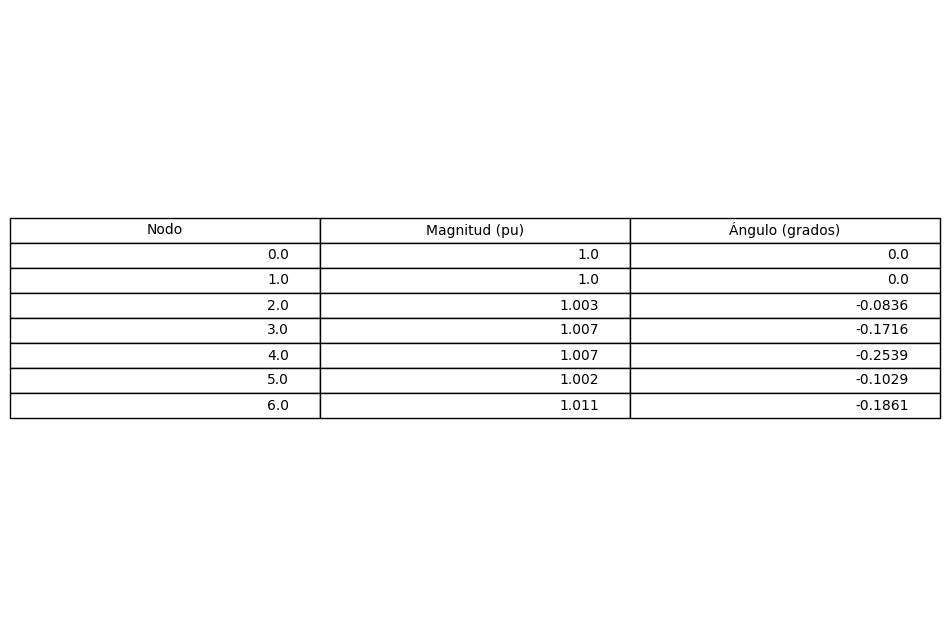

In [12]:
import numpy as np
import pandapower as pp
import pandas as pd
import matplotlib.pyplot as plt

# Configurar el tamaño de las figuras de matplotlib
plt.rcParams['figure.figsize'] = [12, 8]

# Definición de la red y cálculo de Ybus
P = 150
Q = 100

net = pp.create_empty_network()

# Crear barras
bus1 = pp.create_bus(net, vn_kv=110, name="Barra 1")
bus2 = pp.create_bus(net, vn_kv=220, name="Barra 2")
bus1a = pp.create_bus(net, vn_kv=220, name="Barra 1A")
bus2a = pp.create_bus(net, vn_kv=220, name="Barra 2A")
bus3a = pp.create_bus(net, vn_kv=220, name="Barra 3A")
bus1b = pp.create_bus(net, vn_kv=220, name="Barra 1B")
bus2b = pp.create_bus(net, vn_kv=220, name="Barra 2B")

# Crear transformador entre bus 1 y bus 2
pp.create_transformer(net, hv_bus=bus2, lv_bus=bus1, std_type="100 MVA 220/110 kV")

# Crear el generador en bus1 y definirlo como la barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0, va_degree=0, name="Barra Slack")

# Crear cargas entre barras
pp.create_load(net, bus1a, p_mw=0.2*P, q_mvar=0.2*Q, name="Carga 1A")
pp.create_load(net, bus2a, p_mw=0.35*P, q_mvar=0.35*Q, name="Carga 2A")
pp.create_load(net, bus3a, p_mw=0.15*P, q_mvar=0.15*Q, name="Carga 3A")
pp.create_load(net, bus1b, p_mw=0.1*P, q_mvar=0.1*Q, name="Carga 1B")
pp.create_load(net, bus2b, p_mw=0.6*P, q_mvar=0.6*Q, name="Carga 2B")

# Crear líneas entre barras
pp.create_line(net, from_bus=bus2, to_bus=bus1a, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L21A', in_service=True)
pp.create_line(net, from_bus=bus1a, to_bus=bus2a, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L1A2A', in_service=True)
pp.create_line(net, from_bus=bus2a, to_bus=bus3a, length_km=20, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L2A3A', in_service=True)
pp.create_line(net, from_bus=bus3a, to_bus=bus2b, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L3AB', in_service=True)
pp.create_line(net, from_bus=bus2, to_bus=bus1b, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L21B', in_service=True)
pp.create_line(net, from_bus=bus1b, to_bus=bus2b, length_km=30, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name='L1B2B', in_service=True)

pp.runpp(net)
Ybus = net._ppc['internal']['Ybus']
Ybus = Ybus / 100  # Convertir a pu

# Convertir Ybus a un DataFrame de pandas para una mejor visualización
Ybus_df = pd.DataFrame(data=Ybus.todense())

def print_matrix(matrix, name):
    print(f"{name} = [")
    for row in matrix:
        print("  [", end="")
        for val in row:
            print(f"{val.real:.4f} + {val.imag:.4f}j", end=", ")
        print("],")
    print("]")
# Convertir Ybus a una matriz densa para su visualización
Ybus_dense = np.array(Ybus.todense())

# Imprimir Ybus
print("Matriz Ybus (7x7):")
print_matrix(Ybus_dense, "Ybus")



# Función para calcular las inyecciones de potencia en pu
def calcular_inyecciones_potencia(V, Y, S_base):
    I = np.dot(Y, V)
    S = V * np.conj(I)
    P = S.real
    Q = S.imag
    return P, Q

# Función para calcular los errores
def calcular_errores(P_calc, Q_calc, P_spec, Q_spec, PQ_buses, PV_buses, V, V_spec, V_base):
    dP = P_spec - P_calc
    dQ = Q_spec - Q_calc
    
    error_PQ = np.concatenate([dP[PQ_buses], dQ[PQ_buses]])
    error_PV = dP[PV_buses]
    
    # Error en magnitudes de tensiones de nodos PV
    error_V = np.abs(V[PV_buses]) - V_spec 
    
    error = np.concatenate([error_PQ, error_PV, error_V])
    return error

# Función para construir el Jacobiano
def construir_jacobiano(V, Y, PQ_buses, PV_buses, P_calc, Q_calc, S_base, V_base):
    n = len(V)
    m = len(PQ_buses) + len(PV_buses)
    J = np.zeros((2*len(PQ_buses) + len(PV_buses), 2*len(PQ_buses) + len(PV_buses)))

    for i in range(len(PQ_buses)):
        for k in range(len(PQ_buses)):
            p = PQ_buses[i]
            q = PQ_buses[k]
            delta_pq = np.angle(V[p]) - np.angle(V[q])
            
            if i == k:
                J[i, k] = -Q_calc[p] - (V[p].real * 2 + V[p].imag * 2) * Y[p, p].imag
                J[i, k + len(PQ_buses)] = P_calc[p] + (V[p].real * 2 + V[p].imag * 2) * Y[p, p].real
                J[i + len(PQ_buses), k] = P_calc[p] + (V[p].real * 2 + V[p].imag * 2) * Y[p, p].real
                J[i + len(PQ_buses), k + len(PQ_buses)] = Q_calc[p] - (V[p].real * 2 + V[p].imag * 2) * Y[p, p].imag
            else:
                J[i, k] = V[p].real * V[q].real * (Y[p, q].real * np.sin(delta_pq) - Y[p, q].imag * np.cos(delta_pq))
                J[i, k + len(PQ_buses)] = V[p].real * (Y[p, q].real * np.cos(delta_pq) + Y[p, q].imag * np.sin(delta_pq))
                J[i + len(PQ_buses), k] = V[p].real * V[q].real * (Y[p, q].real * np.cos(delta_pq) + Y[p, q].imag * np.sin(delta_pq))
                J[i + len(PQ_buses), k + len(PQ_buses)] = V[p].real * (Y[p, q].real * np.sin(delta_pq) - Y[p, q].imag * np.cos(delta_pq))

    # Jacobiano para nodos PV
    for i in range(len(PV_buses)):
        p = PV_buses[i]
        for k in range(m):
            q = PQ_buses[k] if k < len(PQ_buses) else PV_buses[k - len(PQ_buses)]
            delta_pq = np.angle(V[p]) - np.angle(V[q])
            
            if p == q:
                J[2*len(PQ_buses) + i, k] = -Q_calc[p] - (V[p].real * 2 + V[p].imag * 2) * Y[p, p].imag
            else:
                J[2*len(PQ_buses) + i, k] = V[p].real * V[q].real * (Y[p, q].real * np.sin(delta_pq) - Y[p, q].imag * np.cos(delta_pq))

    return J

# Método de Newton-Raphson en pu
def flujo_de_potencia(Y, V, P_spec, Q_spec, V_spec, S_base, V_base, tol=1e-6, max_iter=3):
    PQ_buses = np.where(Q_spec != 0)[0]
    PV_buses = np.where((Q_spec == 0) & (P_spec != 0))[0]

    for iter in range(max_iter):
        P_calc, Q_calc = calcular_inyecciones_potencia(V, Y, S_base)
        errores = calcular_errores(P_calc, Q_calc, P_spec, Q_spec, PQ_buses, PV_buses, V, V_spec, V_base)
        
        if np.max(np.abs(errores)) < tol:
            print(f'Convergencia alcanzada en {iter+1} iteraciones')
            return V
        
        J = construir_jacobiano(V, Y, PQ_buses, PV_buses, P_calc, Q_calc, S_base, V_base)
        dV = np.linalg.solve(J, errores)
        
        for i, bus in enumerate(PQ_buses):
            V[bus] -= dV[i] + 1j * dV[i + len(PQ_buses)]
        
        for i, bus in enumerate(PV_buses):
            V[bus] = (V[bus] - dV[2*len(PQ_buses) + i]) / np.abs(V[bus]) * V_spec[i] / V_base
        
    print('No se alcanzó la convergencia')
    return V

# Datos iniciales para el flujo de potencia
S_base = 100  # Potencia base definida en MVA
V_base = 220  # Tensión base dada en kV

# Tensiones iniciales aquí se asumió que las magnitudes son de 1 pu y los ángulos son 0 grados.
V = np.ones(len(Ybus_df), dtype=complex) 

# Potencias especificadas en pu
P_spec = np.array([0, 0, -0.2, -0.35, -0.15, -0.1, -0.6])*(150/100)  
Q_spec = np.array([0, 0, -0.2, -0.35, -0.15, -0.1, -0.6])  # Estas están dadas en 0 para las barras PV.

# Magnitudes de tensiones especificadas en nodos PV en pu
V_spec = np.array([1.0]) 

# Llamar a la función de flujo de potencia en pu
V_sol = flujo_de_potencia(Ybus_df.values, V, P_spec, Q_spec, V_spec, S_base, V_base)

# Función para imprimir las tensiones nodales finales en forma de tabla
def imprimir_tensiones_finales(V_sol):
    # Crear un DataFrame para mostrar las tensiones finales
    nodos = range(len(V_sol))
    df = pd.DataFrame({
        'Nodo': nodos,
        'Tensión Final (V)': V_sol
    })
    
    # Mostrar la tabla
    print("Tensiones nodales finales:")
    print(df)

imprimir_tensiones_finales(V_sol)

# Función para mostrar las tensiones nodales finales en forma polar
def plot_tensiones_finales(V_sol):
    # Crear un DataFrame para mostrar las tensiones finales en forma polar
    nodos = range(len(V_sol))
    magnitudes = np.around(np.abs(V_sol), decimals=3)
    angulos = np.around(np.angle(V_sol, deg=True), decimals=4)
    df = pd.DataFrame({
        'Nodo': nodos,
        'Magnitud (pu)': magnitudes,
        'Ángulo (grados)': angulos
   })
    
    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    
    # Crear la tabla
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    
    # Estilizar la tabla
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    # Ocultar los ejes
    ax.axis('off')
    
    # Mostrar la figura
    plt.show()
plot_tensiones_finales(V_sol)


